## Level1 - Zipf Law and Bag of Words

### Zipf Law on Wikepedia (no stopword removal)

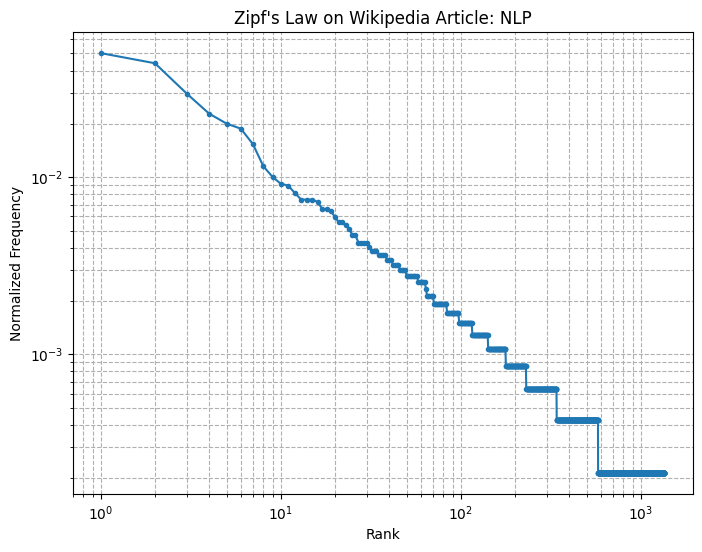

In [1]:
# !pip install wikipedia-api matplotlib numpy

import wikipediaapi
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# --- 1. Fetch a Wikipedia article ---
wiki = wikipediaapi.Wikipedia(
    user_agent='MyNLPBot/0.1 (your_email@example.com)',  # be polite
    language='en'
)

page = wiki.page('Natural_language_processing')

text = page.text

# --- 2. Basic tokenization (case-folded, alphanumeric only) ---
words = re.findall(r'\b\w+\b', text.lower())
counts = Counter(words)

# --- 3. Build Zipf data: frequency vs. rank ---
frequencies = np.array(sorted(counts.values(), reverse=True))
# the ranks are simply the indices of the reverse sorted frequencies
ranks = np.arange(1, len(frequencies) + 1)

# --- 4. Normalize frequencies ---
frequencies = frequencies / frequencies.sum()

# --- 5. Plot on log-log scale ---
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf's Law on Wikipedia Article: NLP")
plt.xlabel("Rank")
plt.ylabel("Normalized Frequency")
plt.grid(True, which="both", linestyle="--")
plt.show()


### Zipf Law plot with stopword removal



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 words BEFORE stopword removal:
[('the', 235), ('of', 206), ('a', 139), ('and', 107), ('to', 94), ('in', 88), ('is', 72), ('language', 54), ('e', 47), ('text', 43), ('as', 42), ('or', 38), ('that', 35), ('g', 35), ('for', 35), ('natural', 34), ('with', 31), ('words', 31), ('nlp', 30), ('are', 28)]

Top 20 words AFTER stopword removal:
[('language', 54), ('e', 47), ('text', 43), ('g', 35), ('natural', 34), ('words', 31), ('nlp', 30), ('given', 25), ('n', 22), ('speech', 20), ('word', 20), ('semantic', 18), ('sentence', 18), ('tasks', 17), ('machine', 17), ('based', 17), ('parsing', 16), ('semantics', 16), ('statistical', 15), ('systems', 15)]


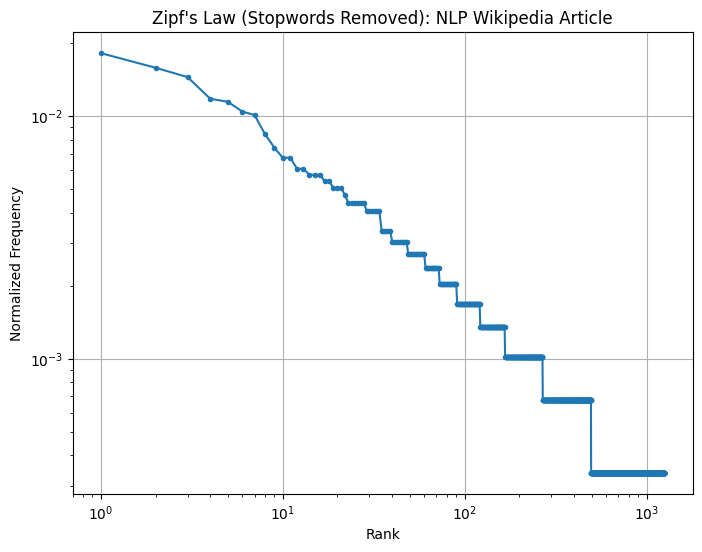

In [2]:
import wikipediaapi
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Wikipedia API with user agent
wiki = wikipediaapi.Wikipedia(
    user_agent='ZipfBot/0.1 (tom@example.com)',
    language='en'
)
page = wiki.page('Natural_language_processing')
text = page.text

# Tokenization + stopword removal
# before stop words
all_words = re.findall(r'\b\w+\b', text.lower())
raw_counts = Counter(all_words)
# Print raw counts for debugging
print("Top 20 words BEFORE stopword removal:")
print(raw_counts.most_common(20))

# After stop words
words = [w for w in all_words if w not in stop_words]
counts = Counter(words)
print("\nTop 20 words AFTER stopword removal:")
print(counts.most_common(20))

# Zipf plot: frequency vs rank
frequencies = np.array(sorted(counts.values(), reverse=True))
# the ranks are simply the indices of the reverse sorted frequencies
ranks = np.arange(1, len(frequencies) + 1)
# Normalize frequencies
frequencies = frequencies / frequencies.sum()

# Plot
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker='.')
plt.title("Zipf's Law (Stopwords Removed): NLP Wikipedia Article")
plt.xlabel("Rank")
plt.ylabel("Normalized Frequency")
plt.grid(True)
plt.show()


### Plot With vs. Without Stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


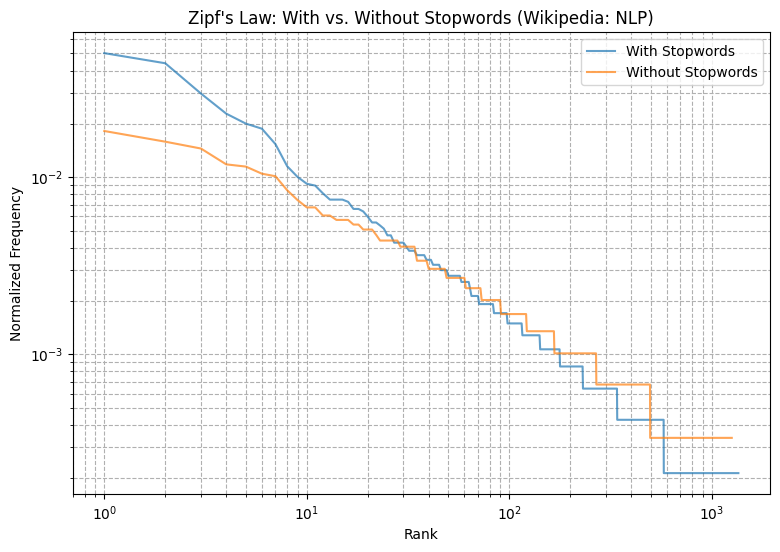

In [3]:
import wikipediaapi
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Fetch Wikipedia article
wiki = wikipediaapi.Wikipedia(
    user_agent='ZipfBot/0.1 (tom@example.com)',
    language='en'
)
page = wiki.page('Natural_language_processing')
text = page.text

# 1. All tokens (lowercase, alphanumeric)
words_all = re.findall(r'\b\w+\b', text.lower())
counts_all = Counter(words_all)

# 2. Filtered (stopwords removed)
words_filtered = [w for w in words_all if w not in stop_words]
counts_filtered = Counter(words_filtered)

# 3. Build frequency lists
freq_all = np.array(sorted(counts_all.values(), reverse=True))
freq_filtered = np.array(sorted(counts_filtered.values(), reverse=True))

# Normalize
freq_all = freq_all / freq_all.sum()
freq_filtered = freq_filtered / freq_filtered.sum()

# Ranks
ranks_all = np.arange(1, len(freq_all) + 1)
ranks_filtered = np.arange(1, len(freq_filtered) + 1)

# 4. Plot
plt.figure(figsize=(9, 6))
plt.loglog(ranks_all, freq_all, label="With Stopwords", alpha=0.7)
plt.loglog(ranks_filtered, freq_filtered, label="Without Stopwords", alpha=0.7)
plt.title("Zipf's Law: With vs. Without Stopwords (Wikipedia: NLP)")
plt.xlabel("Rank")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


### Lemmatization + Stopword Removal    
(e.g., "words", "wording", "worded" → "word")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


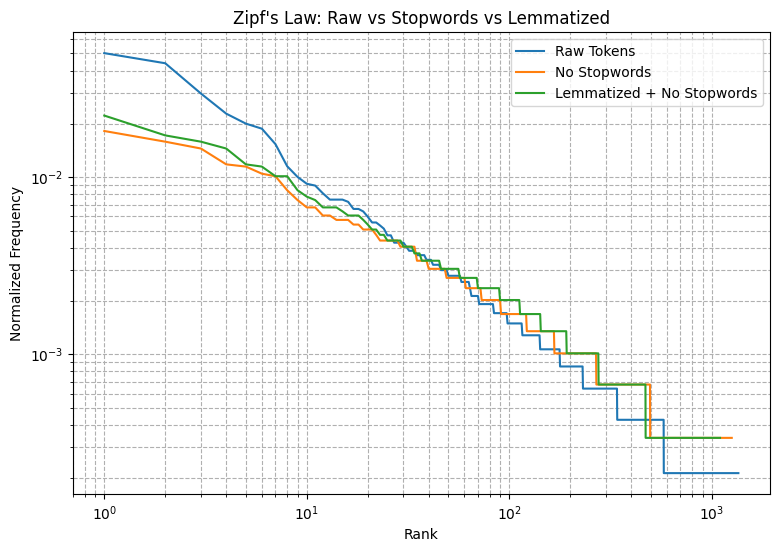

In [4]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

# Downloads
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Helper: Convert POS tag to WordNet format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default

# 1. Tokenize words
words = re.findall(r'\b\w+\b', text.lower())

# 2. POS tagging
tagged_words = pos_tag(words)

# 3. Lemmatize with POS, filter stopwords
lemmatized_words = [
    lemmatizer.lemmatize(w, get_wordnet_pos(pos))
    for w, pos in tagged_words
    if w not in stop_words
]

# 4. Count
counts_lemmatized = Counter(lemmatized_words)

# 5. Zipf prep
freq_lem = np.array(sorted(counts_lemmatized.values(), reverse=True))
freq_lem = freq_lem / freq_lem.sum()
ranks_lem = np.arange(1, len(freq_lem) + 1)

# 6. Plot all three
plt.figure(figsize=(9, 6))
plt.loglog(ranks_all, freq_all, label="Raw Tokens")
plt.loglog(ranks_filtered, freq_filtered, label="No Stopwords")
plt.loglog(ranks_lem, freq_lem, label="Lemmatized + No Stopwords")
plt.title("Zipf's Law: Raw vs Stopwords vs Lemmatized")
plt.xlabel("Rank")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


### TF-IDF + Cosine Similarity Code

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample documents
docs = [
    "The dog chased the ball.",
    "A puppy was playing fetch.",
    "Interest rates rose sharply last year."
]

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(docs)
print("Vocabulary:", vectorizer.vocabulary_)

for i, doc in enumerate(docs):
    vec = tfidf_matrix[i].toarray().flatten()
    tokens = [word for word, idx in vectorizer.vocabulary_.items() if vec[idx] > 0]
    print(f"Doc {i+1} tokens:", tokens)


# Step 2: Cosine similarity
cos_sim = cosine_similarity(tfidf_matrix)

# Step 3: Display matrix
# note that even even though document 1 and 2 are semantically similar, 
# they have no common words, so their cosine similarity is 0.
print("TF-IDF Cosine Similarity Matrix:")
print(np.round(cos_sim, 2))


Vocabulary: {'dog': 2, 'chased': 1, 'ball': 0, 'puppy': 5, 'playing': 4, 'fetch': 3, 'rates': 6, 'rose': 7, 'sharply': 8, 'year': 9}
Doc 1 tokens: ['dog', 'chased', 'ball']
Doc 2 tokens: ['puppy', 'playing', 'fetch']
Doc 3 tokens: ['rates', 'rose', 'sharply', 'year']
TF-IDF Cosine Similarity Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Sample Longer Docs (3 Topics)

In [6]:
docs = [
    """Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language. It focuses on how to program computers to process and analyze large amounts of natural language data.""",

    """Machine learning (ML) is a type of artificial intelligence that enables systems to learn and improve from experience without being explicitly programmed. ML algorithms build a mathematical model based on sample data, known as training data, to make predictions or decisions.""",

    """The Federal Reserve raised interest rates to combat inflation. Higher interest rates can slow borrowing, reduce consumer spending, and cool down an overheating economy. Investors reacted to the Fed's decisions with market volatility."""
]


Top terms for doc 1: ['language' 'computers' 'natural' 'processing' 'process' 'science'
 'subfield' 'linguistics' 'concerned' 'computer']
Top terms for doc 2: ['ml' 'data' 'training' 'programmed' 'sample' 'predictions' 'type' 'learn'
 'mathematical' 'make']
Top terms for doc 3: ['rates' 'spending' 'volatility' 'reserve' 'reacted' 'reduce' 'slow'
 'raised' 'overheating' 'market']


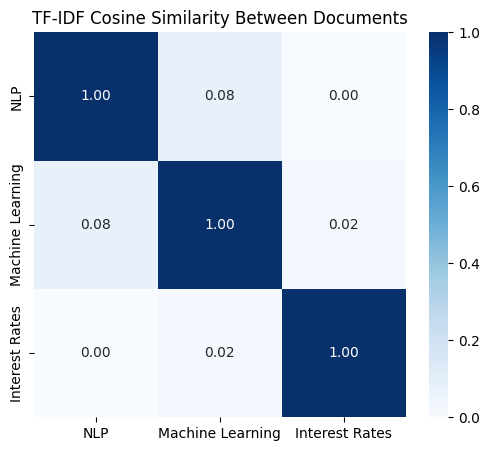

TF-IDF Cosine Similarity Matrix:
[[1.   0.08 0.  ]
 [0.08 1.   0.02]
 [0.   0.02 1.  ]]


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(docs)

# Cosine similarity
cos_sim = cosine_similarity(tfidf_matrix)

# Document labels
labels = ["NLP", "Machine Learning", "Interest Rates"]

# Get feature names (vocabulary)
features = np.array(vectorizer.get_feature_names_out())

# Inspect top features in each doc
for i in range(len(docs)):
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[::-1][:10]
    top_words = features[top_indices]
    print(f"Top terms for doc {i+1}: {top_words}")

# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cos_sim, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt=".2f")
plt.title("TF-IDF Cosine Similarity Between Documents")
plt.show()

# Display matrix
# note that even even though document 1 and 2 are semantically similar, 
# they have no common words, so their cosine similarity is 0.
print("TF-IDF Cosine Similarity Matrix:")
print(np.round(cos_sim, 2))
